# Linear Regression



In our project, we are rewriting the notebook on "Least squares approximation" into an R script. We then extend this model by generating a random multidimensional dataset using Python and performing a multiple linear regression with a neural network.

In [1]:
# The malib library needs to be loaded before rgl
# or it creates a conflict (over GramSchmidt!)
library(matlib)
library(Matrix)
library(MASS)
library(rgl)
library(tidyverse)
library(plot3D)


Attachement du package : 'rgl'


L'objet suivant est masqu'e depuis 'package:matlib':

    GramSchmidt


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x dplyr::select() masks MASS::select()
x tidyr::unpack() masks Matrix::unpack()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


While in Sage, these functions are used to create a matrix:

A = matrix\(QQ, \[\[1,1\],\[2,1\],\[3,1\],\[4,1\],\[5,1\],\[6,1\],\[7,1\]\]\) 

Y = matrix\(QQ, \[\[25\],\[15\],\[9\],\[24\],\[37\],\[50\],\[51\]\]\)

we define the matrices in R as follows.



In [2]:
# Define the matrices A and Y
A <- matrix(c(1, 2, 3, 4, 5, 6, 7, rep(1, times = 7)), ncol = 2)
A
Y <- matrix(c(25, 15, 9, 24, 37, 50, 51), ncol = 1)
Y

1,1
2,1
3,1
4,1
5,1
6,1
7,1


25
15
9
24
37
50
51


In the following we want to solve the least squares minimisation problem.

It is interesting to see, that we need to use the command %\*% in R for matrix\-multiplication while we can just use \* in Sage. This shows again, that Sage is created for mathematical usage while R is not particularly.



In [3]:
# M = (A.transpose()*A).inverse()*A.transpose()
M <- ginv(A) 
M
# P is the projection matrix in R^7
P <- A %*% M
P
# X is the solution to the least squares problem
X <- M %*% Y
X

-0.1071429,-0.07142857,-0.03571429,4.404187e-17,3.571429e-02,0.07142857,0.1071429
0.5714286,0.42857143,0.28571429,1.428571e-01,-4.361179e-17,-0.14285714,-0.2857143


0.46428571,3.571429e-01,0.25000000,0.1428571,0.03571429,-7.142857e-02,-0.17857143
0.35714286,2.857143e-01,0.21428571,0.1428571,0.07142857,1.110223e-16,-0.07142857
0.25000000,2.142857e-01,0.17857143,0.1428571,0.10714286,7.142857e-02,0.03571429
0.14285714,1.428571e-01,0.14285714,0.1428571,0.14285714,1.428571e-01,0.14285714
0.03571429,7.142857e-02,0.10714286,0.1428571,0.17857143,2.142857e-01,0.25000000
-0.07142857,1.110223e-16,0.07142857,0.1428571,0.21428571,2.857143e-01,0.35714286
-0.17857143,-7.142857e-02,0.03571429,0.1428571,0.25000000,3.571429e-01,0.46428571


6.285714
5.000000


In [4]:
# Computing the inverse of A.transpose()*A
# This uses tools from the matlib library
B <- inv(t(A)%*%A)
B

0.03571429,-0.1428571
-0.14285714,0.7142857


In [5]:
# This is the exact formula for the generalized inverse
# namely ginv(A) corresponds to (A.transpose()*A).inverse()*A.transpose
B%*%t(A)

-0.1071428,-0.07142856,-0.03571427,0.00000002,0.03571431,0.0714286,0.1071429
0.5714286,0.42857143,0.28571429,0.14285715,0.00000001,-0.1428571,-0.2857143


In [6]:
# Let us recall ginv(A) as computed by R
ginv(A)

-0.1071429,-0.07142857,-0.03571429,4.404187e-17,3.571429e-02,0.07142857,0.1071429
0.5714286,0.42857143,0.28571429,1.428571e-01,-4.361179e-17,-0.14285714,-0.2857143


In [7]:
# We see that the two matrices do no exatcly coincide, due to rounding errors
ginv(A) == B%*%t(A)

FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


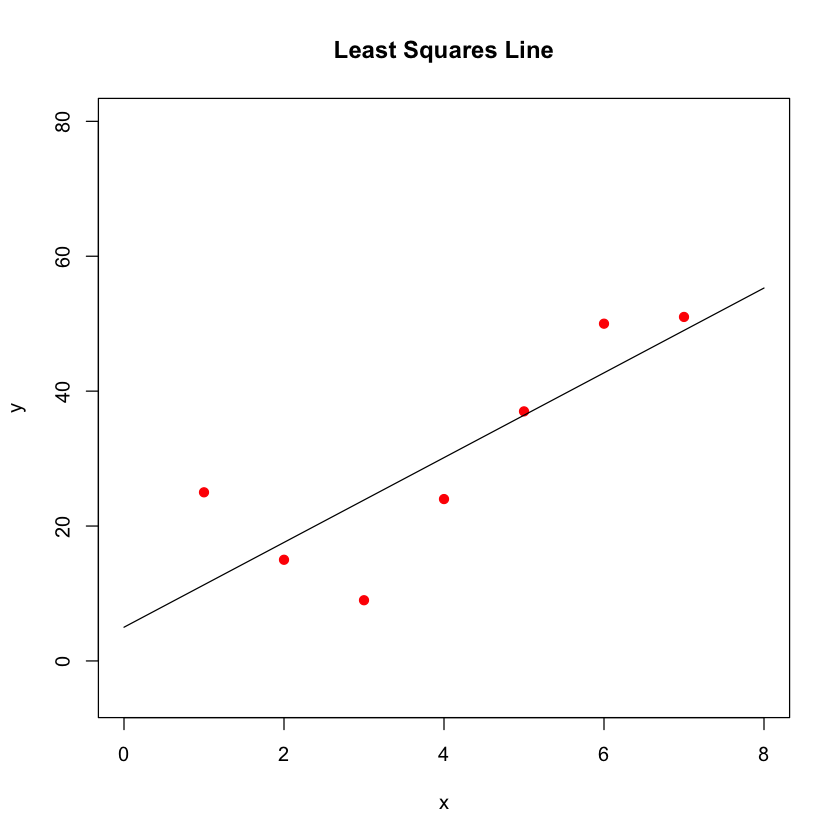

In [8]:
# Initialize the plot figure with axis labels and a title
plot(x = NULL, y = NULL, xlim = c(0, 8), ylim = c(-5, 80), xlab = "x", ylab = "y", main = "Least Squares Line")

# Plot the data points with larger size
points(x = c(1, 2, 3, 4, 5, 6, 7), y = c(25, 15, 9, 24, 37, 50, 51), col = "red", pch = 20, cex = 1.5)

# Define the function corresponding to the least squares line
f <- function(x) { X[1] * x + X[2] }

# Plot the least squares line
curve(f, from = 0, to = 8, add = TRUE)

In the following we will set up the least square parabola.


In [9]:
# Create a new matrix A with three columns
A <- matrix(c(1, 4, 9, 16, 25, 36, 49, 1, 2, 3, 4, 5, 6, 7, rep(1, times=7)), ncol = 3)

# Recalculate M, P, and X for the new matrix A
M <- ginv(A) # Moore-Penrose-Pseudoinverse
M
P <- A %*% M
P
X <- M %*% Y
X

0.05952381,-6.790388e-18,-0.03571429,-0.04761905,-0.03571429,-3.005410e-17,0.05952381
-0.58333333,-7.142857e-02,0.25000000,0.38095238,0.32142857,7.142857e-02,-0.36904762
1.28571429,4.285714e-01,-0.14285714,-0.42857143,-0.42857143,-1.428571e-01,0.42857143


0.76190476,3.571429e-01,0.07142857,-0.0952381,-0.14285714,-0.07142857,0.11904762
0.35714286,2.857143e-01,0.21428571,0.1428571,0.07142857,0.00000000,-0.07142857
0.07142857,2.142857e-01,0.28571429,0.2857143,0.21428571,0.07142857,-0.14285714
-0.09523810,1.428571e-01,0.28571429,0.3333333,0.28571429,0.14285714,-0.09523810
-0.14285714,7.142857e-02,0.21428571,0.2857143,0.28571429,0.21428571,0.07142857
-0.07142857,-1.665335e-16,0.07142857,0.1428571,0.21428571,0.28571429,0.35714286
0.11904762,-7.142857e-02,-0.14285714,-0.0952381,0.07142857,0.35714286,0.76190476


1.738095
-7.619048
25.857143


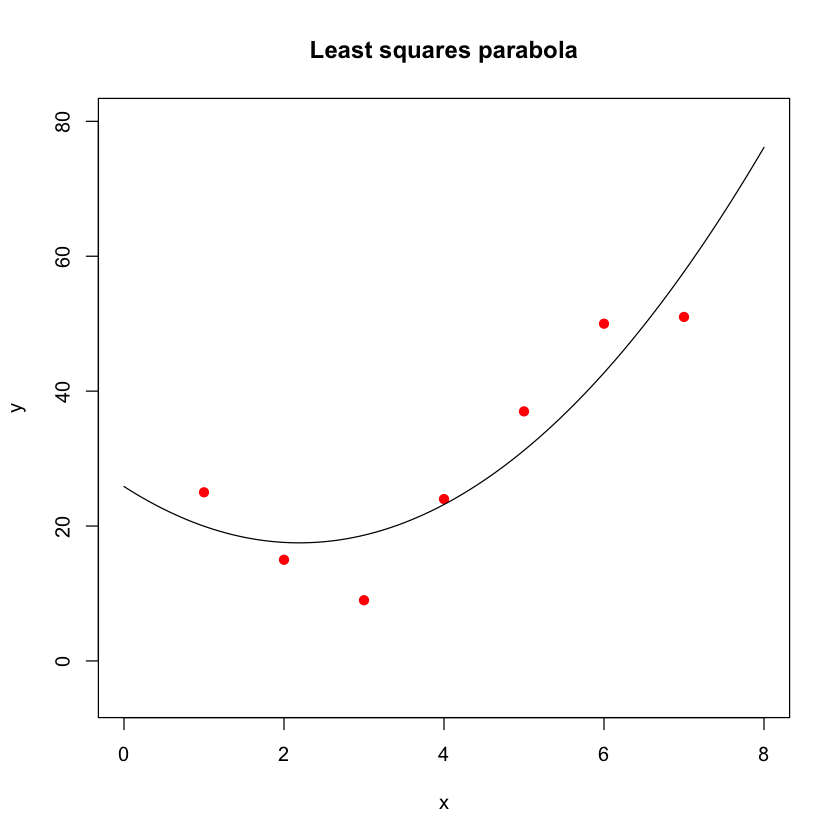

In [10]:
# Initialize the plot figure
plot(x = NULL, y = NULL, xlim = c(0, 8), ylim = c(-5, 80), xlab = "x", ylab = "y", main = "Least squares parabola")
# Replot the data points
points(x = c(1, 2, 3, 4, 5, 6, 7), y = c(25, 15, 9, 24, 37, 50, 51), col = "red", pch = 20, cex = 1.5)
# Define the function corresponding to the least squares parabola
g <- function(x) { X[1] * x^2 + X[2] * x + X[3] }
# Plot the least squares parabola
curve(g, from = 0, to = 8, add = TRUE)

In the notebook on least square approximation, the next step involves comparing the "predicted value for y8" with the "decimal approximation of y8".

y8 = f.substitute\( x == 8\)

show\(y8\)

RR\(y8\)

However, this comparison does not make sense in the given R code. In symbolic computation systems like Sage, mathematical expressions are often represented symbolically, meaning they are represented as symbolic variables and equations. The decimal approximation is obtained by converting the symbolic expression to a decimal number using a function like RR\(\).


If for example the the rank of the matrix A is not full, we cannot use the model we set up earlier but we can ask R to find the linear regression coefficients, just like in Sage.

data = \[\(1,25\),\(2,15\),\(3,9\),\(4,24\),\(5,37\),\(6,50\),\(7,51\)\]

var\('a, b, x'\)

model\(x\) = a\*x \+ b

sol = find\_fit\(data,model\)

show\(sol\)

fnum = model\(a=sol\[0\].rhs\(\),b=sol\[1\].rhs\(\)\)

show\(fnum\)

var\('a, b, c, x'\)

model2\(x\) = a\*x^2 \+ b\*x \+c

sol2 = find\_fit\(data,model2\)

gnum = model2\(a=sol2\[0\].rhs\(\),b=sol2\[1\].rhs\(\),c=sol2\[2\].rhs\(\)\)

show\(gnum\)


In [12]:
data <- data.frame(x = c(1, 2, 3, 4, 5, 6, 7), y = c(25, 15, 9, 24, 37, 50, 51))

# Fit a linear model to the data
lm_fit <- lm(y ~ x, data = data)
print(lm_fit)

# Fit a quadratic model to the data
quad_fit <- lm(y ~ poly(x, 2, raw = TRUE), data = data)
print(quad_fit)


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
      5.000        6.286  


Call:
lm(formula = y ~ poly(x, 2, raw = TRUE), data = data)

Coefficients:
            (Intercept)  poly(x, 2, raw = TRUE)1  poly(x, 2, raw = TRUE)2  
                 25.857                   -7.619                    1.738  



In [13]:
# Compare the constant coefficients of the two quadratic polynomials
c1 <- coef(quad_fit)[1]
c2 <- g(0)
c1 - c2
c1 == c2

(Intercept) 
-3.552714e-15

(Intercept) 
      FALSE

---